In [1]:
#-*- coding:utf8-*-
%matplotlib inline

from __future__ import absolute_import, division, print_function, unicode_literals

from IPython.display import Image

import numpy as np

import uncertainties as unc
from uncertainties import unumpy as unp
from uncertainties.unumpy import std_devs as stds #TODO
from uncertainties.unumpy import nominal_values as noms #TODO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
from matplotlib.path import Path
import matplotlib.patches as patches

import seaborn as sns
sns.set(context="paper",font_scale=1.4)

import scipy as sp
import scipy.constants as const

import sympy as sym

import pandas as pd

import ROOT as rt

import root_numpy as rnp

from aputils.latextables.tables import Table


# Fehlerfortpflanzung beim Mitteln
umean = unc.wrap(np.mean)

#Laden des Latex fonts 
plt.rcParams['text.latex.preamble']=["\\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

#Größe der Achsenbeschriftung
axis_font = {'size':'12'}

# Pfade
path_graphics = "../Grafiken/"
path_table = "../Tabellen/"
path_data = "../Messdaten/"

In [209]:
# Funktionen
# Achsenbeschriftungen
def axis_label(label,sym=None,unit=None):
    if sym == None:
        return lable
    elif unit == None:
        return r"".join([label," ${s}$".format(s=sym)])
    else:
        return r"".join([label," ${s}/\mathrm{{{u}}}$".format(s=sym,u=unit)])
    
# Fit Funktionen
def fit_errors(popt,pcov):
    errors = np.sqrt(np.diag(pcov))
    param_err = unp.uarray(popt,errors)
    return param_err
    
def print_errors(array,description=None):
    if description and len(description)==len(array):
        maxlen = max(map(len,description))
        lens = map(len,description)
        for i,entry in enumerate(array):
            print(description[i]," "*(maxlen-lens[i]),entry.nominal_value,"+/-",entry.std_dev)
    else:
        for i,entry in enumerate(array):
            print(entry.nominal_value,"+/-",entry.std_dev)

In [381]:
# Laden der Messdaten
modi = pd.read_csv(path_data+"Moden.csv",comment="#")
electric_tuning = pd.read_csv(path_data+"Elektronische_Abstimmung.csv",comment="#")
frequency_meassurement = pd.read_csv(path_data+"Frequenzmessung.csv",comment="#")
attenuation = pd.read_csv(path_data+"Daempfung.csv",comment="#")
swr_small =  pd.read_csv(path_data+"SWR.csv",comment="#")
swr_3dB =  pd.read_csv(path_data+"SWR_3dB_Methode.csv",comment="#")
swr_attenuation = pd.read_csv(path_data+"SWR_Abschwaecher_Methode.csv",comment="#")
errors = pd.read_csv(path_data+"Fehler.csv",comment="#")


In [383]:
#Fehlerbehaftete Messwerte
modi_err = modi.copy()
modi_err.U0 = unp.uarray(modi.U0,errors.U)
modi_err.U1 = unp.uarray(modi.U1,errors.U)
modi_err.U2 = unp.uarray(modi.U2,errors.U)
modi_err.A0 = unp.uarray(modi.A0,errors.A)
modi_err.f0 = unp.uarray(modi.f0,errors.f)

electric_tuning_err = electric_tuning.copy()
electric_tuning_err.U0 = unp.uarray(electric_tuning.U0,errors.U)
electric_tuning_err.f0 = unp.uarray(electric_tuning.f0,errors.f)

frequency_meassurement_err = frequency_meassurement.copy()
frequency_meassurement_err.L_min1 = unp.uarray(frequency_meassurement.L_min1,errors.d2)
frequency_meassurement_err.L_min2 = unp.uarray(frequency_meassurement.L_min2,errors.d2)
frequency_meassurement_err.f = unp.uarray(frequency_meassurement.f,errors.f)
frequency_meassurement_err.a = unp.uarray(frequency_meassurement.a,errors.a)
attenuation_err = attenuation.copy()
attenuation_err.d = unp.uarray(attenuation.d,errors.d1)
attenuation_err.D = unp.uarray(attenuation.D,errors.D)
swr_small_err = swr_small.copy()
swr_small_err.s = unp.uarray(swr_small.s,errors.d1)

swr_3dB_err = swr_3dB.copy()
swr_3dB_err.L_Min1 = unp.uarray(swr_3dB.L_Min1,errors.d2)
swr_3dB_err.L_Min2 = unp.uarray(swr_3dB.L_Min2,errors.d2)
swr_3dB_err.d1 = unp.uarray(swr_3dB.d1,errors.d1)
swr_3dB_err.d2 = unp.uarray(swr_3dB.d2,errors.d1)
swr_attenuation_err = swr_attenuation.copy()
swr_attenuation_err.A1 = unp.uarray(swr_attenuation.A1,errors.D)
swr_attenuation_err.A2 = unp.uarray(swr_attenuation.A2,errors.D)
swr_attenuation_err

,A1,A2
0,20.0+/-1.0,5.0+/-1.0


In [303]:
modi

,U0,U1,U2,A0,f0
0,155.0+/-5.0,140,170,5.8,9143
1,235.0+/-5.0,220,245,5.3,9142
2,100.0+/-5.0,90,110,4.6,9148


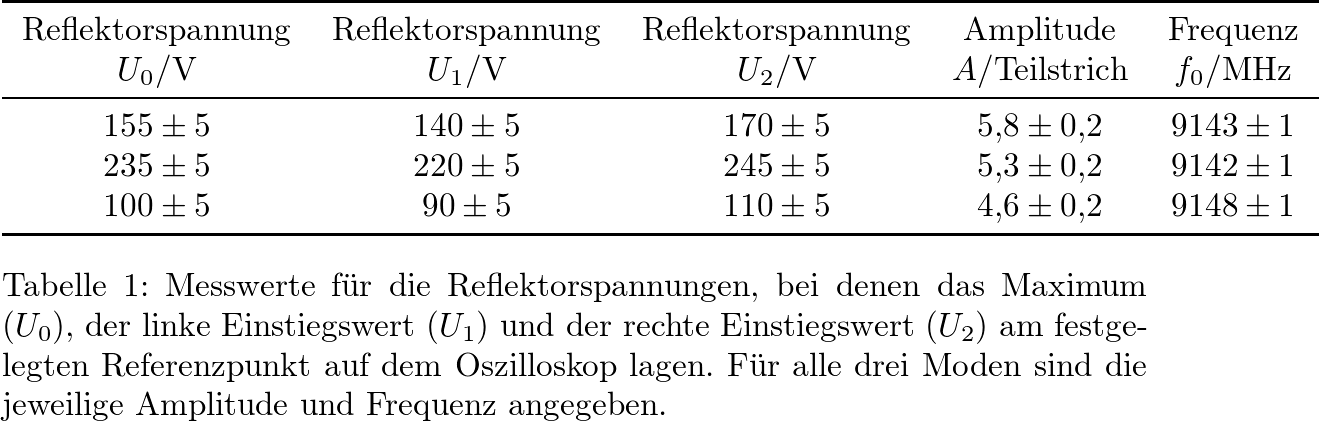

In [373]:
#Tabellen der Messwerte
Tab_modi = Table(siunitx=True,booktabs=True)
Tab_modi.caption("""Messwerte für die Reflektorspannungen, bei denen das Maximum ($U_0$),
                 der linke Einstiegswert ($U_1$) und der rechte Einstiegswert ($U_2$)
                 am festgelegten Referenzpunkt auf dem Oszilloskop lagen.
                 Für alle drei Moden sind die jeweilige Amplitude und Frequenz angegeben.
                """)
Tab_modi.label("Moden")
Tab_modi.addColumn(modi_err.U0.values,title="Reflektorspannung",symbol=r"U_0",unit="V")
Tab_modi.addColumn(modi_err.U1.values,title="Reflektorspannung",symbol=r"U_1",unit="V")
Tab_modi.addColumn(modi_err.U2.values,title="Reflektorspannung",symbol=r"U_2",unit="V")
Tab_modi.addColumn(modi_err.A0.values,title="Amplitude",symbol=r"A",unit="Teilstrich")
Tab_modi.addColumn(modi_err.f0.values,title="Frequenz",symbol=r"f_0",unit="MHz")

Image(Tab_modi.show(ipynb=True),width=800)
#Tab_modi.save(path_table+"Moden.tex")

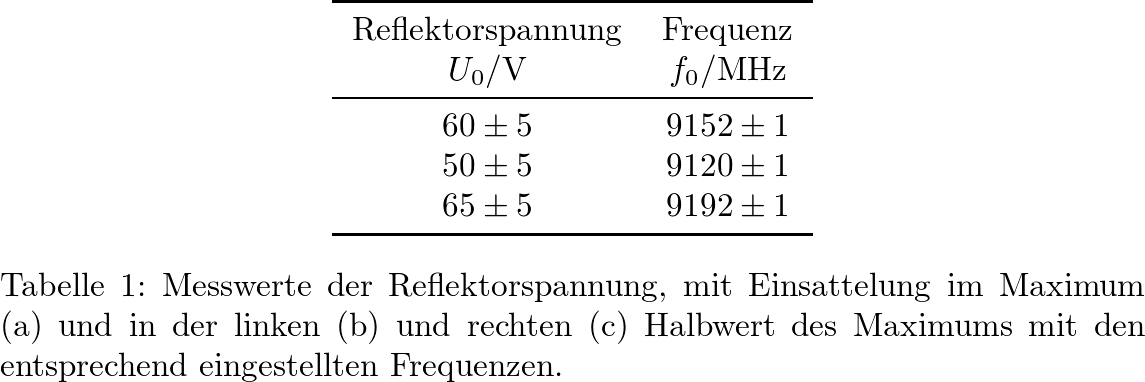

In [377]:
#Tabellen der Messwerte
Tab_tuning = Table(siunitx=True,booktabs=True)
Tab_tuning.caption("""Messwerte der Reflektorspannung, mit Einsattelung im Maximum (a)
                    und in der linken (b) und rechten (c) Halbwert des Maximums mit den 
                    entsprechend eingestellten Frequenzen.
                """)
Tab_tuning.label("Elektrische Abstimmung")
Tab_tuning.addColumn(electric_tuning_err.U0.values,title="Reflektorspannung",symbol=r"U_0",unit="V")
Tab_tuning.addColumn(electric_tuning_err.f0.values,title="Frequenz",symbol=r"f_0",unit="MHz")
Image(Tab_tuning.show(ipynb=True),width=800)
#Tab_tuning.save(path_table+"Elektronische_Abstimmung.tex")

In [234]:
frequency_meassurement

,f,L_min1,L_min2,a
0,9144,72,96,22.7


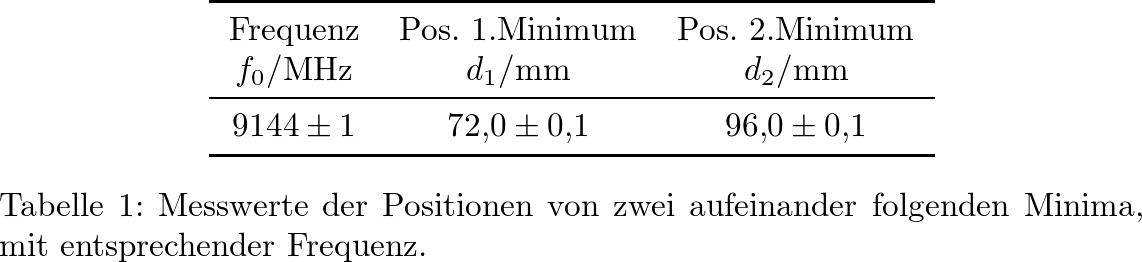

In [386]:
Tab_freq = Table(siunitx=True,booktabs=True)
Tab_freq.caption("""Messwerte der Positionen von zwei aufeinander folgenden Minima, mit entsprechender Frequenz. 
                """)
Tab_freq.label("Elektrische Abstimmung")
Tab_freq.addColumn(frequency_meassurement_err.f.values,title="Frequenz",symbol=r"f_0",unit="MHz")
Tab_freq.addColumn(frequency_meassurement_err.L_min1.values,title="Pos. 1.Minimum",symbol=r"d_1",unit="mm")
Tab_freq.addColumn(frequency_meassurement_err.L_min2.values,title="Pos. 2.Minimum",symbol=r"d_2",unit="mm")
Image(Tab_freq.show(ipynb=True),width=800)
#Tab_freq.save(path_table+"Frequenzmessung.tex")

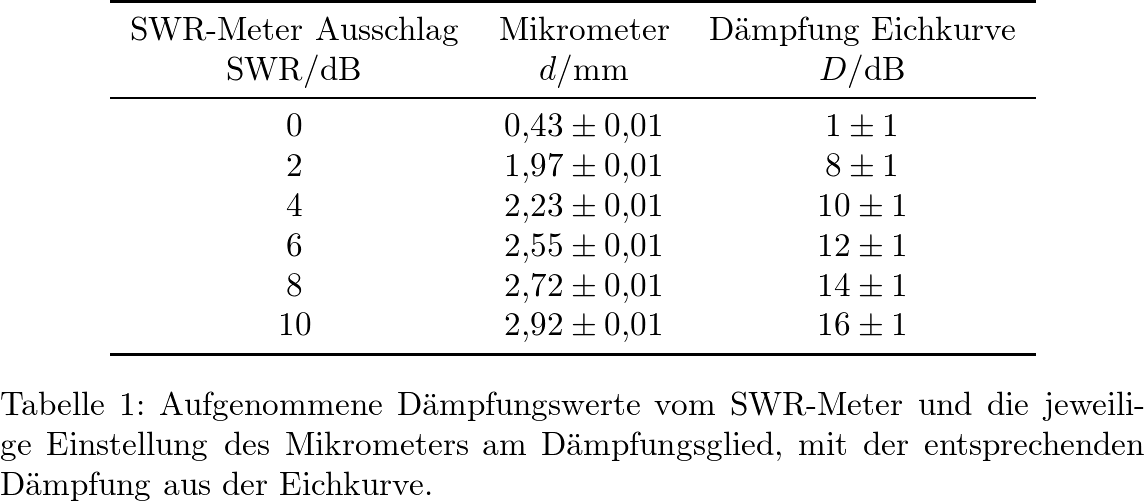

In [389]:
Tab_att = Table(siunitx=True,booktabs=True)
Tab_att.caption("""Aufgenommene Dämpfungswerte vom SWR-Meter und die jeweilige Einstellung
                des Mikrometers am Dämpfungsglied, mit der entsprechenden Dämpfung aus der Eichkurve.""")
Tab_att.label("Daempfung")
Tab_att.addColumn(attenuation_err.SWR.values,title="SWR-Meter Ausschlag",symbol="\\mathrm{SWR}",unit="dB")
Tab_att.addColumn(attenuation_err.d.values,title="Mikrometer",symbol="d",unit="mm")
Tab_att.addColumn(attenuation_err.D.values,title="Dämpfung Eichkurve",symbol="D",unit="dB")
Image(Tab_att.show(ipynb=True),width=800)
#Tab_att.save(path_table+"Daempfung.tex")

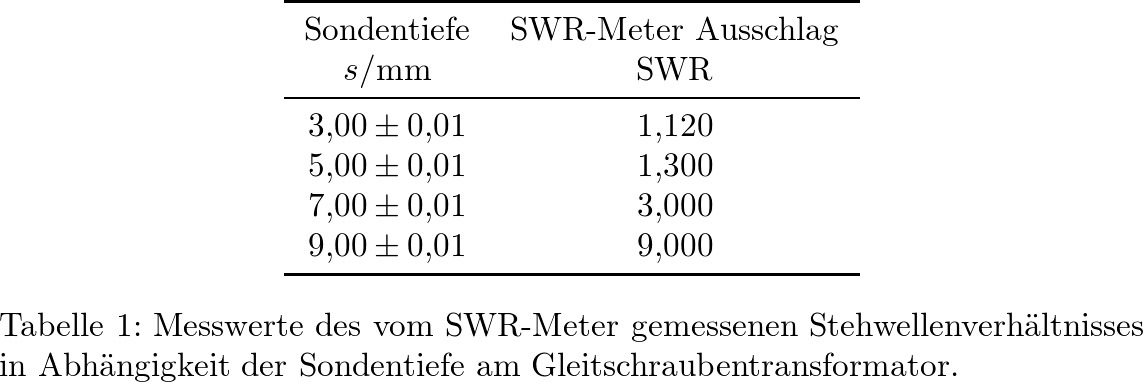

In [392]:
Tab_swr = Table(siunitx=True,booktabs=True)
Tab_swr.caption("""Messwerte des vom SWR-Meter gemessenen Stehwellenverhältnisses in Abhängigkeit der Sondentiefe 
                am Gleitschraubentransformator.""")
Tab_swr.label("SWR_Meter")
Tab_swr.addColumn(swr_small_err.s.values,title="Sondentiefe",symbol=r"s",unit="mm")
Tab_swr.addColumn(swr_small_err.SWR.values,title="SWR-Meter Ausschlag",symbol=r"\mathrm{SWR}")
Image(Tab_swr.show(ipynb=True),width=800)
#Tab_swr.save(path_table+"SWR_Meter.tex")

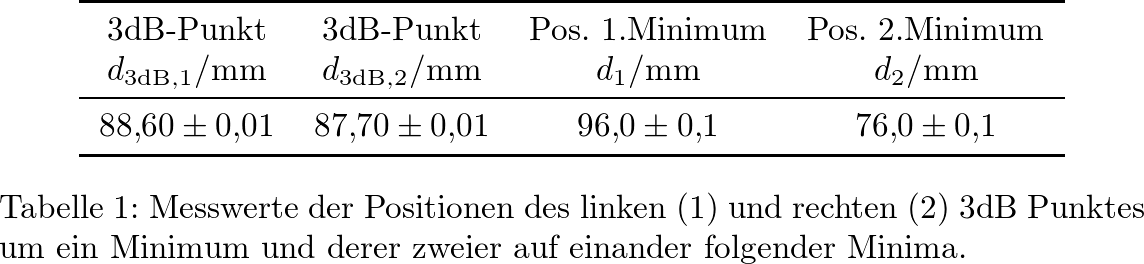

In [395]:
Tab_swr_3db = Table(siunitx=True,booktabs=True)
Tab_swr_3db.caption(""" Messwerte der Positionen des linken (1) und rechten (2) 3dB Punktes um ein Minimum
                    und derer zweier auf einander folgender Minima.""")
Tab_swr_3db.label("SWR_3dB_Methode")
Tab_swr_3db.addColumn(swr_3dB_err.d1.values,title="3dB-Punkt",symbol=r"d_{3\mathrm{dB},1}",unit="mm")
Tab_swr_3db.addColumn(swr_3dB_err.d2.values,title="3dB-Punkt",symbol=r"d_{3\mathrm{dB},2}",unit="mm")
Tab_swr_3db.addColumn(swr_3dB_err.L_Min1.values,title="Pos. 1.Minimum",symbol=r"d_1",unit="mm")
Tab_swr_3db.addColumn(swr_3dB_err.L_Min2.values,title="Pos. 2.Minimum",symbol=r"d_2",unit="mm")
Image(Tab_swr_3db.show(ipynb=True),width=800)
#Tab_swr_3db.save(path_table+"SWR_3dB_Methode.tex")

In [246]:
swr_3dB

,d1,d2,L_Min1,L_Min2
0,88.6,87.7,96,76


,Test,Test2,Test3
0,1,1,1.00+/-0.10
1,2,2,2.00+/-0.20
2,3,3,3.00+/-0.30
3,4,4,4.0+/-0.4


In [213]:
modi

,U0,U1,U2,A0,f0
0,155,140,170,5.8,9143
1,235,220,245,5.3,9142
2,100,90,110,4.6,9148


In [396]:
# Vertices for the mode-curves
verts_0 = [
    (modi.U1[0], 0),
    (modi.U1[0], 0), # P1
    (modi.U0[0], 2.26*modi.A0[0]), # P2
    (modi.U2[0], 0.), # P3
    ]

verts_1 = [
    (modi.U1[1], 0),
    (modi.U1[1], 0), # P1
    (modi.U0[1], 2.26*modi.A0[1]), # P2
    (modi.U2[1], 0.), # P3
    ]

verts_2 = [
    (modi.U1[2], 0),
    (modi.U1[2], 0), # P1
    (modi.U0[2], 2.26*modi.A0[2]), # P2
    (modi.U2[2], 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path_0 = Path(verts_0, codes)
path_1 = Path(verts_1, codes)
path_2 = Path(verts_2, codes)

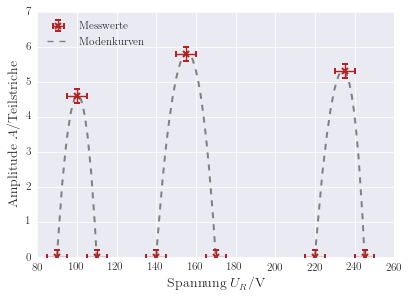

In [399]:
# Plot der Modenkurven
legend_line = Line2D([],[],linestyle="dashed",color="gray")
fig,ax = plt.subplots()
for path in [path_0,path_1,path_2]:
    patch = patches.PathPatch(path, facecolor='none', lw=2,linestyle="dashed",edgecolor="gray")
    ax.add_patch(patch)

ax.errorbar(np.hstack([modi.U0.values,modi.U1.values,modi.U2.values]),np.hstack([modi.A0.values,[0,0,0,0,0,0]]),
         marker="x",mew=2,color="firebrick",linestyle="",label="Messwerte",xerr=[errors.U]*9,yerr=[errors.A]*9)
ax.set_xlim(80,260)
ax.set_ylim(0,7)
ax.set_xlabel(axis_label("Spannung",sym="U_R",unit="V"),axis_font)
ax.set_ylabel(axis_label("Amplitude",sym="A",unit="Teilstriche"),axis_font)

handles,labels = ax.get_legend_handles_labels()
handles.append(legend_line)
labels.append("Modenkurven")
ax.legend(handles, labels,loc="upper left")
fig.savefig(path_graphics+"Modenkurven.pdf")

In [401]:
#Berechnung der Bandbreite und Abstimmempfindlichkeit
electric_bandwidth = electric_tuning_err.f0[2]-electric_tuning_err.f0[1]
sensitivity = electric_bandwidth/(electric_tuning_err.U0[2]-electric_tuning_err.U0[1])
print("Elektrische Bandbreite:",electric_bandwidth)
print("Abstimmempfindlichkeit:",sensitivity)

Elektrische Bandbreite: 72.0+/-1.4
Abstimmempfindlichkeit: 4.8+/-2.3


In [403]:
# Berechnung der Frequenz
wavelength_waveguide = 2 * (frequency_meassurement_err.L_min2[0] - frequency_meassurement_err.L_min1[0])
print("Wellenlänge im Hohlleiter:",wavelength_waveguide,"mm")
freqency_waveguide = (const.c*1000) * unp.sqrt((1/wavelength_waveguide)**2 + (1/(2*frequency_meassurement_err.a[0]))**2)
print("Frequenz im Hohlleiter",freqency_waveguide)

Wellenlänge im Hohlleiter: 48.00+/-0.28 mm
Frequenz im Hohlleiter (9.089+/-0.027)e+09


299792458.0

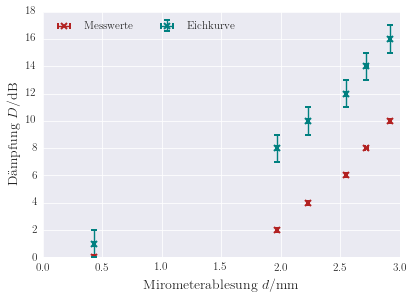

In [410]:
#Berechnung der Dämpfung 
fig,ax = plt.subplots()
ax.errorbar(attenuation.d.values,attenuation.SWR.values,xerr=6*[errors.d1],
            marker="x",mew=2,color="firebrick",linestyle="",label="Messwerte")

ax.errorbar(attenuation.d.values,attenuation.D.values,xerr=6*[errors.d1],yerr=6*[errors.D],
            marker="x",mew=2,color="teal",linestyle="",label="Eichkurve")
ax.set_xlim(0,3)
ax.set_ylim(0,18)
ax.set_xlabel(axis_label("Mirometerablesung",sym="d",unit="mm"),axis_font)
ax.set_ylabel(axis_label("Dämpfung",sym="D",unit="dB"),axis_font)
ax.legend(loc="upper left",ncol=2)
fig.savefig(path_graphics+"Daempfung.pdf")

In [414]:
#Messung des SWRs
#Messung der 3dB Methode
wavelength_waveguide = 2 * (swr_3dB_err.L_Min1[0] - swr_3dB_err.L_Min2[0])
print("Wellenlänge im Hohlleiter",wavelength_waveguide,"mm")
SWR = unp.sqrt(1+  1/(unp.sin(np.pi*(swr_3dB_err.d1[0]-swr_3dB_err.d2[0])/wavelength_waveguide)**2)) 
SWR_approx = wavelength_waveguide/np.pi*(swr_3dB_err.d1[0]-swr_3dB_err.d2[0])
print("Stehwellenverhältnis",SWR)
print("Stehwellenverhältnis approx.",SWR_approx)

#Messung der Abschwächer Methode
SWR = 10 * (swr_attenuation_err.A1[0]-swr_attenuation_err.A2[0])/20
print("Stehwellenverhältnis (Abschwächer Methode)",SWR)

Wellenlänge im Hohlleiter 40.00+/-0.28 mm
Stehwellenverhältnis 14.19+/-0.24
Stehwellenverhältnis approx. 11.46+/-0.20
Stehwellenverhältnis (Abschwächer Methode) 7.5+/-0.7
